In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
df = pd.read_csv('../data/df_fake_news.csv')

In [3]:
df = df[df['text'].notnull()]
df = df.dropna()
df.reset_index(inplace=True)
#df = df.drop(axis=1, columns='level_0')
df

,index,title,text,subject,date,category,length_text,length_title
0,0,donald trump send embarrass new year eve messa...,donald trump wish american happi new year leav...,News,736694,0,255,9
1,1,drunk brag trump staffer start russian collus ...,hous intellig committe chairman devin nune go ...,News,736694,0,178,8
2,2,sheriff david clark becom internet joke threat...,friday reveal former milwauke sheriff david cl...,News,736693,0,315,10
3,3,trump obsess even obama name code websit imag,christma day donald trump announc back work fo...,News,736692,0,238,8
4,4,pope franci call donald trump christma speech,pope franci use annual christma day messag reb...,News,736688,0,208,7
...,...,...,...,...,...,...,...,...
38208,38259,north korea shipment syria chemic arm agenc in...,unit nation two north korean shipment syrian g...,worldnews,736562,1,275,10
38209,38260,lexisnexi withdrew two product chines market,london lexisnexi provid legal regulatori busi ...,worldnews,736563,1,73,6
38210,38261,minsk cultur hub becom author,minsk shadow disus sovietera factori minsk str...,worldnews,736563,1,169,5
38211,38262,vatican upbeat possibl pope franci visit russia,moscow vatican secretari state cardin pietro p...,worldnews,736563,1,116,7


In [4]:
df = df.drop(axis=1, columns='index')

comparando el largo de los textos en fake_news con real_news

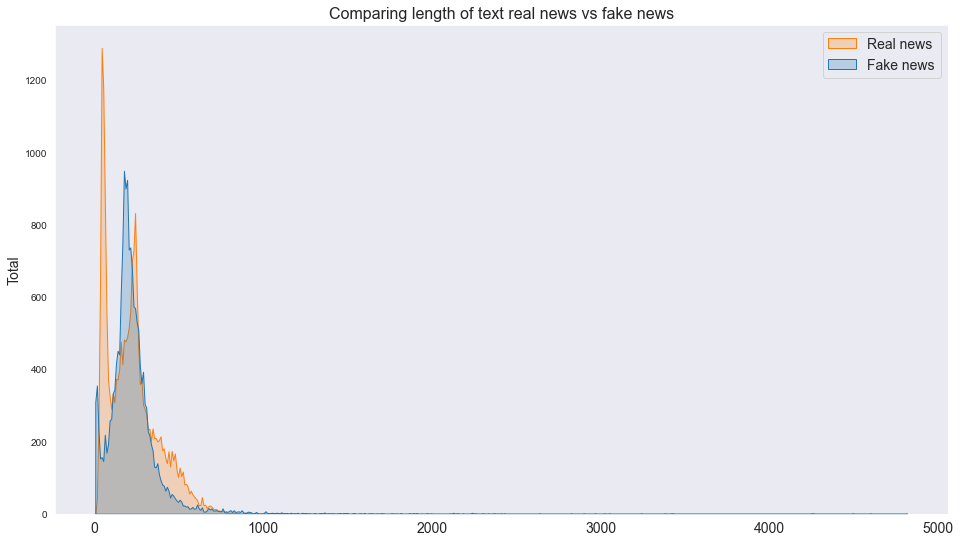

In [56]:
plt.figure(figsize=(16,9))
sns.histplot(x='length_text', data=df, hue='category', element="poly")
plt.title('Comparing length of text real news vs fake news', fontsize=16)
plt.ylabel('Total', fontsize=14)
plt.xlabel("")
plt.xticks(fontsize=14)
sns.set_style("dark")
plt.legend(['Real news', 'Fake news'], fontsize=14)
plt.show()

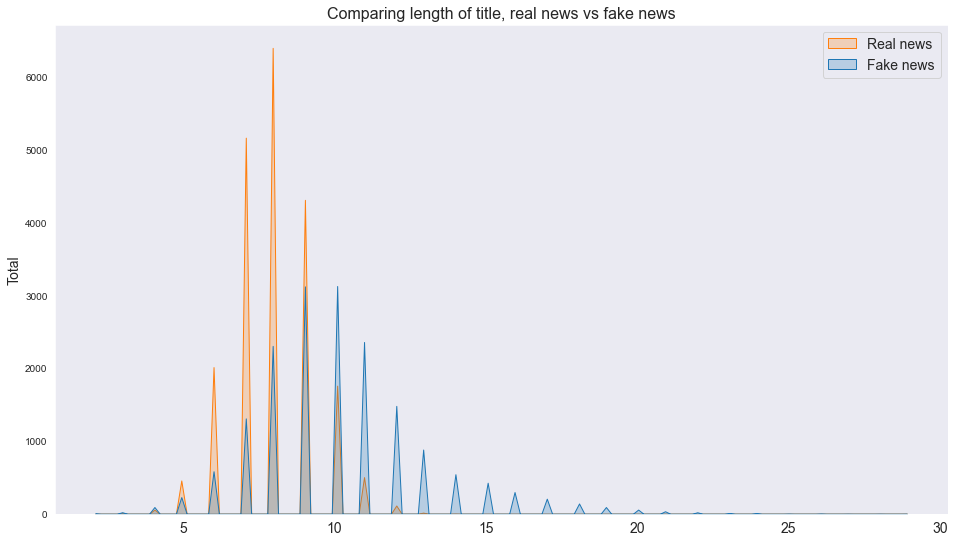

In [55]:
plt.figure(figsize=(16,9))
sns.histplot(x='length_title', data=df, hue='category', element="poly")
plt.title('Comparing length of title, real news vs fake news', fontsize=16)
plt.ylabel('Total', fontsize=14)
plt.xlabel("")
plt.xticks(fontsize=14)
sns.set_style("dark")
plt.legend(['Real news', 'Fake news'], fontsize=14)
plt.show()

In [6]:
df_real = df.loc[df["category"] == 1]
df_fake = df.loc[df["category"] == 0] 

In [7]:
print("Average length of real news: ", round(df_real["length_text"].mean(),2))
print("Average length of fake news: ", round(df_fake["length_text"].mean(),2))
print('-'*38)
print("diff real news vs fake news:   ", round(df_real["length_text"].mean() - df_fake["length_text"].mean()),2)

Average length of real news:  222.58
Average length of fake news:  229.29
--------------------------------------
diff real news vs fake news:    -7 2


In [8]:
# splitting "text" and "title" to count the words

In [9]:
def split_words(news):
    news = news.split()
    return news 
df_real['text'] = df_real['text'].apply(split_words)
df_fake['text'] = df_fake['text'].apply(split_words)
df_real['title'] = df_real['title'].apply(split_words)
df_fake['title'] = df_fake['title'].apply(split_words)

In [10]:
# to detect the most repeated keywords in df_fake'text'
words = [wrd for x in df_fake['text'] for wrd in x]
# importing Counter to count repeated words
from collections import Counter
keywords_text_fake = Counter(words)
keywords_text_fake = pd.DataFrame.from_dict(keywords_text_fake, orient='index').reset_index()
keywords_text_fake = keywords_text_fake.sort_values(by=[0], ascending=False)
keywords_text_fake.columns = ['fake_word_text','count']
keywords_text_fake.head(5)

,fake_word_text,count
1,trump,64057
242,said,22884
33,presid,21077
80,peopl,20748
21,one,18254


In [11]:
# to detect the most repeated keywords in df_real'text'
words = [wrd for x in df_real['text'] for wrd in x]
# importing Counter to count repeated words
from collections import Counter
keywords_text_real = Counter(words)
keywords_text_real = pd.DataFrame.from_dict(keywords_text_real, orient='index').reset_index()
keywords_text_real = keywords_text_real.sort_values(by=[0], ascending=False)
keywords_text_real.columns = ['real_word_text','count']
keywords_text_real.head(5)

,real_word_text,count
95,said,96024
64,trump,52049
5,us,37247
129,state,35190
62,presid,27269


In [12]:
# to detect the most repeated keywords in df_real'title'.
words = [wrd for x in df_real['title'] for wrd in x]
# importing Counter to count repeated words
from collections import Counter
keywords_titles_real = Counter(words)
keywords_titles_real = pd.DataFrame.from_dict(keywords_titles_real, orient='index').reset_index()
keywords_titles_real = keywords_titles_real.sort_values(by=[0], ascending=False)
keywords_titles_real.columns = ['real_word_title','count']
keywords_titles_real.head(5)

,real_word_title,count
28,trump,5199
0,us,3843
43,say,3137
37,hous,1446
15,senat,1179


In [13]:
# to detect the most repeated keywords in df_fake'title'.
words = [wrd for x in df_fake['title'] for wrd in x]
# importing Counter to count repeated words
from collections import Counter
keywords_titles_fake = Counter(words)
keywords_titles_fake = pd.DataFrame.from_dict(keywords_titles_fake, orient='index').reset_index()
keywords_titles_fake = keywords_titles_fake.sort_values(by=[0], ascending=False)
keywords_titles_fake.columns = ['fake_word_title','count']
keywords_titles_fake.head(5)

,fake_word_title,count
1,trump,7185
150,video,5878
28,obama,1645
74,watch,1538
792,hillari,1407


In [14]:
print("Real news, total title words: ",  keywords_titles_real["count"].sum())
print("Fake news ,total title words: ",  keywords_titles_fake["count"].sum())
print('-'*38)
print("Diff real news vs fake news:  ", keywords_titles_real["count"].sum() - keywords_titles_fake["count"].sum())

Real news, total title words:  165614
Fake news ,total title words:  177142
--------------------------------------
Diff real news vs fake news:   -11528


In [15]:
print("Real news, average title words: ",  round(keywords_titles_real["count"].mean(),2))
print("Fake news, average title words: ",  round(keywords_titles_fake["count"].mean(),2))
print('-'*38)
print("Diff real news vs fake news:     ", round(keywords_titles_real["count"].mean() -keywords_titles_fake["count"].mean(),2))

Real news, average title words:  16.94
Fake news, average title words:  13.47
--------------------------------------
Diff real news vs fake news:      3.46


In [16]:
print("Real news, total text words: ",  keywords_text_real["count"].sum())
print("Fake news, total text words: ",  keywords_text_fake["count"].sum())
print('-'*38)
print("Diff real news vs fake news:  ", keywords_text_real["count"].sum()-keywords_text_fake["count"].sum())

Real news, total text words:  4634155
Fake news, total text words:  3988051
--------------------------------------
Diff real news vs fake news:   646104


In [17]:
print("Real news, average text words: ",  round(keywords_text_real["count"].mean(),2))
print("Fake news, average text words: ",  round(keywords_text_fake["count"].mean(),2))
print('-'*38)
print("Diff real news vs fake news:   ", round(keywords_text_real["count"].mean()- keywords_text_fake["count"].mean(),2))

Real news, average text words:  79.79
Fake news, average text words:  26.45
--------------------------------------
Diff real news vs fake news:    53.34


In [18]:
vocabulary_title_real= set()
for title in df_real["title"]:
    for word in title:
        if word not in vocabulary_title_real:
            vocabulary_title_real.add(word)
print("Number of uniques words in all real news titles:  ", len(vocabulary_title_real))
####################################
vocabulary_title_fake= set()
for title in df_fake["title"]:
    for word in title:
        if word not in vocabulary_title_fake:
            vocabulary_title_fake.add(word)
print("Number of uniques words in all fake news titles: ", len(vocabulary_title_fake))
print('-'*60)
print("Diff real news vs fake news:                     ",len(vocabulary_title_real)- len(vocabulary_title_fake))

Number of uniques words in all real news titles:   9777
Number of uniques words in all fake news titles:  13146
------------------------------------------------------------
Diff real news vs fake news:                      -3369


In [19]:
vocabulary_text_real= set()
for text in df_real["text"]:
    for word in text:
        if word not in vocabulary_text_real:
            vocabulary_text_real.add(word)
print("Number of uniques words in all real news texts:  ", len(vocabulary_text_real))
####################################
vocabulary_text_fake= set()
for text in df_fake["text"]:
    for word in text:
        if word not in vocabulary_text_fake:
            vocabulary_text_fake.add(word)
print("Number of uniques words in all fake news texts: ", len(vocabulary_text_fake))
print('-'*60)
print("Diff real news vs fake news:                    ", len(vocabulary_text_real) - len(vocabulary_text_fake))

Number of uniques words in all real news texts:   58078
Number of uniques words in all fake news texts:  150761
------------------------------------------------------------
Diff real news vs fake news:                     -92683


#### Splitting the dataframe

In [20]:
Y = df["category"]

#### Making train and test data

In [21]:
# Splitting the data into 70 percent train and 30 percent test
X_train, X_test, Y_train, Y_test = train_test_split(df["text"], Y, test_size=0.30, random_state=40)

### <span style="color:#306998">Tfidf vectorizer</span>
<span style="color:#356F9F"> TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.  </span> 

In [22]:
# Applying tfidf
tfidf_vect = TfidfVectorizer(max_df=0.7)
tfidf_train = tfidf_vect.fit_transform(X_train)
tfidf_test = tfidf_vect.transform(X_test)

In [23]:
print(tfidf_test)

  (0, 141211)	0.09440054519568006
  (0, 139123)	0.4666664771609954
  (0, 139069)	0.044152959363686385
  (0, 138713)	0.1149081668945718
  (0, 138213)	0.027241312188272172
  (0, 136667)	0.06381630143595325
  (0, 134405)	0.029051880799046477
  (0, 134232)	0.04507223089232721
  (0, 131939)	0.06442766883977837
  (0, 129143)	0.23504623161521807
  (0, 128677)	0.023921123939448154
  (0, 128010)	0.14539296413100106
  (0, 127403)	0.019150582657493913
  (0, 127286)	0.11265228107529975
  (0, 126417)	0.018784957904135303
  (0, 126283)	0.03321559141168778
  (0, 125022)	0.0483052552493117
  (0, 122794)	0.05011429325340952
  (0, 121014)	0.031357983956307844
  (0, 119681)	0.07420809241434706
  (0, 118490)	0.02803427275254568
  (0, 115577)	0.0662341208994039
  (0, 114369)	0.040840990243144096
  (0, 112678)	0.03191497938451975
  (0, 111726)	0.02386813656653379
  :	:
  (11463, 81780)	0.07655523135488976
  (11463, 79082)	0.16964771319542882
  (11463, 76529)	0.07900442845045798
  (11463, 76106)	0.0839792501

In [24]:
print(tfidf_vect.get_feature_names()[-10:])

['zyklon', 'zynga', 'zypri', 'zyuganov', 'zyuseragentifzxzbreak', 'zzzzaaaacccchhh', 'zzzzzzzz', 'zzzzzzzzzzzzz', 'émigré', 'ツ_']


In [25]:
count_vect = CountVectorizer()
count_train = count_vect.fit_transform(X_train.values)
count_test = count_vect.transform(X_test.values)

In [26]:
print(count_test)

  (0, 697)	1
  (0, 1030)	3
  (0, 1290)	2
  (0, 2500)	1
  (0, 5395)	1
  (0, 6043)	1
  (0, 6736)	1
  (0, 7026)	1
  (0, 8253)	2
  (0, 9516)	1
  (0, 9919)	1
  (0, 11807)	1
  (0, 18073)	1
  (0, 18390)	1
  (0, 20184)	1
  (0, 21865)	1
  (0, 22383)	1
  (0, 22482)	9
  (0, 22667)	2
  (0, 24624)	1
  (0, 25224)	3
  (0, 25422)	1
  (0, 25560)	1
  (0, 27109)	1
  (0, 27153)	1
  :	:
  (11463, 44194)	1
  (11463, 45141)	2
  (11463, 51346)	1
  (11463, 52223)	2
  (11463, 53472)	1
  (11463, 56747)	1
  (11463, 57813)	1
  (11463, 67650)	1
  (11463, 76106)	1
  (11463, 76529)	1
  (11463, 79082)	1
  (11463, 81780)	1
  (11463, 97094)	1
  (11463, 97884)	1
  (11463, 101494)	1
  (11463, 104440)	1
  (11463, 105144)	1
  (11463, 106957)	1
  (11463, 110219)	1
  (11463, 115173)	1
  (11463, 118553)	1
  (11463, 128678)	1
  (11463, 128684)	1
  (11463, 129908)	1
  (11463, 142663)	1


In [27]:
print(count_vect.get_feature_names()[0:10])

['10', '100th', '104', '109year', '10yearold', '11', '11pro', '12', '126', '12yearold']


## Machine learning

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [29]:
#Applying Naive Bayes
clf = MultinomialNB() 
clf.fit(tfidf_train, Y_train)                       
pred = clf.predict(tfidf_test)                     
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
print(cm)

accuracy:   0.920
[[4437  776]
 [ 141 6110]]


In [30]:
print('Wrong predictions out of total')
print((Y_test !=pred).sum(),'/',((Y_test == pred).sum()+(Y_test != pred).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred))

Wrong predictions out of total
917 / 11464
Percentage accuracy:  92.0010467550593


In [31]:
## Plotting confusion matrix for TF-Idf vectorizer

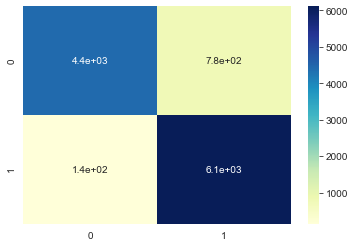

In [47]:
sns.heatmap(cm, cmap="YlGnBu", annot=True);

### Count Vectorized

In [33]:
#Applying Naive Bayes
clf = MultinomialNB() 
clf.fit(count_train, Y_train)                       
pred1 = clf.predict(count_test)                    
score = metrics.accuracy_score(Y_test, pred1)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y_test, pred1)
print(cm2)

accuracy:   0.948
[[4891  322]
 [ 273 5978]]


In [34]:
print('Wrong predictions out of total')
print((Y_test !=pred1).sum(),'/',((Y_test == pred1).sum()+(Y_test != pred1).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred1))

Wrong predictions out of total
595 / 11464
Percentage accuracy:  94.80983949755756


In [35]:
## Plotting confusion matrix for Count vectorizer.

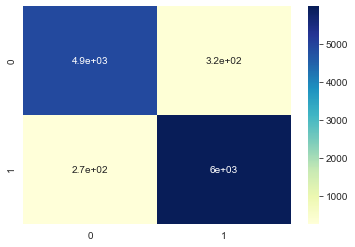

In [50]:
sns.heatmap(cm2, cmap="YlGnBu", annot=True);

## 2. Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestClassifier

### TF-Idf Vectorized

In [38]:
RF=RandomForestClassifier().fit(tfidf_train,Y_train)
#predict on train 
train_preds2 = RF.predict(tfidf_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

#predict on test
test_preds2 = RF.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))
print('-'*50)



#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds2))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds2))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))
print('-'*50)

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9581297976273552
--------------------------------------------------
confusion_matrix train is:  [[12180     0]
 [    0 14569]]
confusion_matrix test is:  [[4873  340]
 [ 140 6111]]
Wrong predictions out of total
--------------------------------------------------
480 / 11464
--------------------------------------------------


### Count Vectorized

In [39]:
RF=RandomForestClassifier().fit(count_train,Y_train)
#predict on train 
train_preds3 = RF.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))

#predict on test
test_preds3 = RF.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))
print('-'*50)



#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds3))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds3))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
print('-'*50)

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9607466852756456
--------------------------------------------------
confusion_matrix train is:  [[12180     0]
 [    0 14569]]
confusion_matrix test is:  [[4868  345]
 [ 105 6146]]
Wrong predictions out of total
--------------------------------------------------
450 / 11464
--------------------------------------------------


## K-Nearest Neighbour

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(tfidf_train,Y_train)
#predict on train 
train_preds4 = KNN.predict(tfidf_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds4))

#predict on test
test_preds4 = KNN.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is:  ", accuracy_score(Y_test, test_preds4))
print('-'*50)

Model accuracy on train is:  0.8815656660062059
Model accuracy on test is:   0.8319085833914864
--------------------------------------------------


In [42]:
#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds4))
print("confusion_matrix test is:  ", metrics.confusion_matrix(Y_test, test_preds4))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds4).sum(),'/',((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))

print('-'*50)

confusion_matrix train is:  [[ 9374  2806]
 [  362 14207]]
confusion_matrix test is:   [[3547 1666]
 [ 261 5990]]
Wrong predictions out of total
--------------------------------------------------
1927 / 11464
--------------------------------------------------


In [43]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(count_train,Y_train)
#predict on train 
train_preds5 = KNN.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = KNN.predict(count_test)
#accuracy on test
print("Model accuracy on test is:  ", accuracy_score(Y_test, test_preds5))
print('-'*50)

Model accuracy on train is:  0.8059740551048638
Model accuracy on test is:   0.7512212142358689
--------------------------------------------------


In [44]:
#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds5))
print("confusion_matrix test is:  ", metrics.confusion_matrix(Y_test, test_preds5))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds5).sum(),'/',((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))

print('-'*50)

confusion_matrix train is:  [[ 9025  3155]
 [ 2035 12534]]
confusion_matrix test is:   [[3529 1684]
 [1168 5083]]
Wrong predictions out of total
--------------------------------------------------
2852 / 11464
--------------------------------------------------
